# Pyber Ride Sharing Analysis

1. With the exception of a few outliers, the scatter plot shows an inverse relationhsip between supply and demand. Looking at the rural areas, the rates tend to be higher to compensate for the scarcity of drivers. As we move more into the more suburban and urban areas where populations are more dense, the number of drivers become more dense as well ultimately making the price lower. 

2. The first and second pie charts look very similar. They show that both the number rides and number of fares are higher in the urban and suburban areas.The more people there are, the higher the need for transportation. 

3. The last pie chart shows a considerable difference in the number of drivers per city type. Due to the high population density in the urban areas, the number of rides per city is significantly higher. The higher the need for transportation in the urban area calls for a higher number of drivers. 

In [1]:
%matplotlib inline
###### Dependencies and Setup#####
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#####File to Load#####
load_city = "data/city_data.csv"
load_ride = "data/ride_data.csv"

#####Read the City and Ride Data#####
city_data_df=pd.read_csv(load_city)
ride_data_df=pd.read_csv(load_ride)

#####Combine the data into a single dataset#####
combined_data_df = pd.merge(city_data_df, ride_data_df, how = 'outer', on= 'city')

#####Display the data table for preview#####
combined_data_df.head(10)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


In [2]:
#####Define color chart#####
color_chart = {'Light Coral':'#F08080', 'Light Sky Blue':'#87CEFA','Gold':'#FFD700'}

## Bubble Plot of Ride Sharing Data

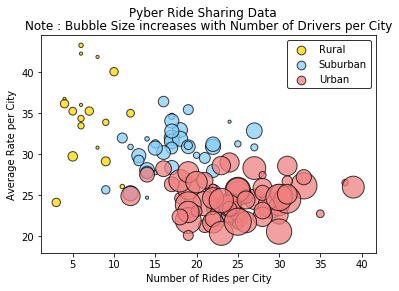

<Figure size 432x288 with 0 Axes>

In [3]:
##### Obtain the x and y coordinates for each of the three city types#####

##### Group data based on city, city type and ride count #####
grouped_city = combined_data_df.groupby('city')


avg_fare = grouped_city.mean()['fare']


ride_count = grouped_city['ride_id'].count()


driver_count = grouped_city.mean()['driver_count']


city_type = city_data_df.set_index('city')['type']

city_info = pd.DataFrame({
    "Total Rides": ride_count,
    "Average Fare": avg_fare,
    "Total Drivers": driver_count,
    "Type of City": city_type
})


city_info.sort_values('Total Drivers', ascending = False)

#####df per city type#####
rural = city_info[city_info['Type of City'] == 'Rural']
suburban = city_info[city_info['Type of City'] == 'Suburban']
urban = city_info[city_info['Type of City'] == 'Urban']

#####Color Dictionary#####
city_color = {'Urban': color_chart['Light Coral'], 'Suburban': color_chart['Light Sky Blue'], 'Rural': color_chart['Gold']}

plt.suptitle('Pyber Ride Sharing Data')

#####Build the scatter plots for each city types#####
plt.scatter(rural['Total Rides'], rural['Average Fare'], s = rural['Total Drivers']*10, color = city_color['Rural'], edgecolor = 'black', label = 'Rural', alpha = .75)
plt.scatter(suburban['Total Rides'], suburban['Average Fare'], s = suburban['Total Drivers']*10, color = city_color['Suburban'], edgecolor = 'black', label = 'Suburban', alpha = .75)
plt.scatter(urban['Total Rides'], urban['Average Fare'], s = urban['Total Drivers']*10, color = city_color['Urban'], edgecolor = 'black', label = 'Urban', alpha = .75)

#####Incorporate the other graph properties and Incorporate a text label regarding circle size#####
plt.title('Note : Bubble Size increases with Number of Drivers per City')
plt.xlabel('Number of Rides per City')
plt.ylabel('Average Rate per City')

#####Create a legend#####
chart_legend = plt.legend(frameon = True, edgecolor = 'black')
chart_legend.legendHandles[0]._sizes = [75]
chart_legend.legendHandles[1]._sizes = [75]
chart_legend.legendHandles[2]._sizes = [75]

##### Show Plot #####
plt.show()

#####Save Figure#####
plt.savefig('C:/Users/c_tra_000/ClassRepoDemoGit/UCFLM201809DATA2/05-Matplotlib/Homework/Ride Share Data.png')

## Total Fares by City Type

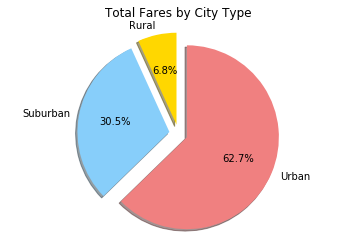

<Figure size 432x288 with 0 Axes>

In [4]:
#####Calculate Type Percents#####

fare_type = combined_data_df.groupby('type')['type','fare','ride_id','driver_count']

#####Build Pie Chart#####
#####Total Fares#####
fare_total = fare_type.sum()['fare']

#####Chart attributes#####
labels = fare_total.index
explode = [0.1, 0.1, 0.1]
colors=[city_color[n] for n in labels]

#####Chart code#####
plt.pie(fare_total, startangle = 90, explode = explode, colors= colors,labels = labels, autopct = "%1.1f%%", shadow = True)

#####Visual touch ups#####
plt.title('Total Fares by City Type')
plt.axis('equal')

#####Show and Save Figure#####
plt.show()
plt.savefig('C:/Users/c_tra_000/ClassRepoDemoGit/UCFLM201809DATA2/05-Matplotlib/Homework/City_type_pie.png')

## Total Rides by City Type

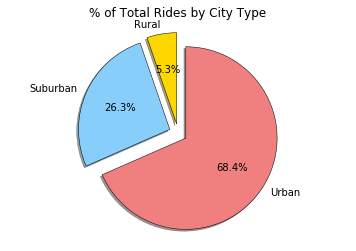

In [5]:
#####Calculate Ride Percents#####
total_rides = fare_type.count()['ride_id']

#####Build Pie Chart#####
labels = total_rides.index
plt.pie(total_rides, startangle = 90, explode = explode, colors= colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Rides by City Type')
plt.axis('equal')

#####Save Figure#####
plt.savefig('C:/Users/c_tra_000/ClassRepoDemoGit/UCFLM201809DATA2/05-Matplotlib/Homework/Total Ride Type_pie.png')

#####Show plot#####
plt.show()

## Total Drivers by City Type

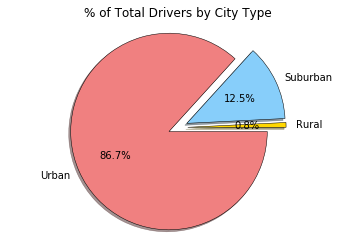

In [6]:
#####Calculate Ride Percents#####
total_drivers = fare_type.sum()['driver_count']

#####Build Pie Chart#####
labels = total_drivers.index
plt.pie(total_drivers, startangle = 0, explode = explode, colors=colors, labels = labels, autopct = "%1.1f%%", shadow = True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title('% of Total Drivers by City Type')
plt.axis('equal')

#####Save Figure#####
plt.savefig('C:/Users/c_tra_000/ClassRepoDemoGit/UCFLM201809DATA2/05-Matplotlib/Homework/Total Driver Pie.png')

#####Show plot#####
plt.show()